Inspired/based on https://github.com/rayidghani/magicloops and https://github.com/dssg/MLforPublicPolicy/blob/master/labs/2019/lab6_feature_generation_sol.ipynb

In [389]:
import pipeline_evictions as pipeline
import ml_loop_evictions as loop

import importlib
import datetime
import pandas as pd
import numpy as np

# Read data

In [376]:
importlib.reload(pipeline)

datafile = "data/tracts.csv"

#Read data, parsing year column to date type
data = pd.read_csv(datafile, parse_dates=['year'])

# Explore data

In [377]:
#--->PENDING

# Create outcome label

In [378]:
importlib.reload(pipeline)

#--->PENDING
#In the mean time: Assigning 1 to everyone with eviction rate over 10%
data['top_10_percent'] = np.where(data['eviction-rate']>10, 1, 0)

label ='top_10_percent'

# Create temporal train and test sets

In [379]:
importlib.reload(pipeline)
from dateutil.relativedelta import relativedelta

#Create sets of train and test data, based on different split thresholds
#The split thresholds corresponds to the starting date of the testing data

#--->PENDING. How many splits?
split_thresholds = [pd.Timestamp(i,1,1) for i in range (2014, 2017)]

#Indicating which is the column to be used for splitting training and test daata
date_column='year'

#Amount of data used for test set
test_window = relativedelta(months=12)

#Gap needed between training and test set

#--->PENDING. To be changed. 1 year?
#Careful with possible error in create_temp_validation_train_and_testing_sets
#due to the fact that test_window and gap were equal.
gap_training_test = relativedelta(year=0)

#Generate train and test sets
train_test_sets= pipeline.create_temp_validation_train_and_testing_sets(
  data,
  date_column,
  label,
  split_thresholds,
  test_window,
  gap_training_test)

# Process data

In [380]:
importlib.reload(pipeline)

#Impute data on continuous columns for each training and test set

#--->PENDING
#In the meantime, imputing all float columns with mean

float_columns = [column for column in data.columns if data[column].dtype=='float']

#Do not consider GEOID column
float_columns=float_columns[1:]

for train_test_set in train_test_sets:
  train_data = train_test_set['x_train']
  test_data = train_test_set['x_test']

  #fill na values with mean
  pipeline.fill_na_columns_with_mean(train_data, float_columns)
  pipeline.fill_na_columns_with_mean(test_data, float_columns)


# Create features

In [381]:
importlib.reload(pipeline)

#We will have to generate features independently for each different train/test set
for train_test_set in train_test_sets:
  
  #--->PENDING. create_features function
  train_features, test_features = pipeline.create_features(train_test_set)

  #Replace raw data in train_test_set with features generated
  train_test_set['x_train'] = train_features
  train_test_set['x_test'] = test_features

# Build Clasifiers and parameters generation

In [382]:
importlib.reload(pipeline)

#We define the specific models we want to run
models_to_run=['DT','LR','RF','ET','KNN','NB','BA','AB','GB']#'SVM'

#Get all posible models and their different sets of parameters
models, parameters_grid = pipeline.get_models_and_parameters('test')

# Loop over models and different training/test sets

In [383]:
importlib.reload(pipeline)
import warnings

warnings.filterwarnings('ignore')

results = pipeline.iterate_over_models_and_training_test_sets(models_to_run, models, parameters_grid, train_test_sets)
results

2019-06-02 14:28:08.121668: Running DT with params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 10} on train/test set 2014-01-01 00:00:00
2019-06-02 14:28:08.533845: Running LR with params: {'C': 0.01, 'penalty': 'l1'} on train/test set 2014-01-01 00:00:00
2019-06-02 14:28:09.407598: Running RF with params: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1} on train/test set 2014-01-01 00:00:00
2019-06-02 14:28:09.747417: Running ET with params: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1} on train/test set 2014-01-01 00:00:00
2019-06-02 14:28:10.191761: Running KNN with params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'} on train/test set 2014-01-01 00:00:00
2019-06-02 14:28:10.524618: Running NB with params: {} on train/test set 2014-01-01 00:00:00
2019-06-02 14:28:10.748152: Running BA with params: {'max_features': 1, 'n_estimators': 10} on train/test set 2

,model_name,model,parameters,test_set_start_date,baseline,p_at_1,r_at_1,f1_at_1,p_at_2,r_at_2,...,p_at_20,r_at_20,f1_at_20,p_at_30,r_at_30,f1_at_30,p_at_50,r_at_50,f1_at_50,auc-roc
0,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'min_sam...",2014-01-01,0.114780,0.105263,0.009132,0.016807,0.315789,0.054795,...,0.293963,0.511416,0.373333,0.195804,0.511416,0.283186,0.229560,1.000000,0.373402,0.729657
1,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",2014-01-01,0.114780,0.842105,0.073059,0.134454,0.842105,0.146119,...,0.409449,0.712329,0.520000,0.319930,0.835616,0.462705,0.219078,0.954338,0.356351,0.884074
2,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2014-01-01,0.114780,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.110140,0.287671,0.159292,0.200210,0.872146,0.325661,0.598595
3,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2014-01-01,0.114780,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.115385,0.301370,0.166877,0.219078,0.954338,0.356351,0.621929
4,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2014-01-01,0.114780,0.894737,0.077626,0.142857,0.921053,0.159817,...,0.419948,0.730594,0.533333,0.328671,0.858447,0.475348,0.229560,1.000000,0.373402,0.888231
5,NB,"GaussianNB(priors=None, var_smoothing=1e-09)",{},2014-01-01,0.114780,0.526316,0.045662,0.084034,0.605263,0.105023,...,0.433071,0.753425,0.550000,0.307692,0.803653,0.445006,0.203354,0.885845,0.330776,0.865460
6,BA,"(KNeighborsClassifier(algorithm='auto', leaf_s...","{'max_features': 1, 'n_estimators': 10}",2014-01-01,0.114780,1.000000,0.086758,0.159664,0.973684,0.168950,...,0.475066,0.826484,0.603333,0.332168,0.867580,0.480405,0.212788,0.926941,0.346121,0.903534
7,AB,"(DecisionTreeClassifier(class_weight=None, cri...","{'algorithm': 'SAMME', 'n_estimators': 1}",2014-01-01,0.114780,0.105263,0.009132,0.016807,0.315789,0.054795,...,0.293963,0.511416,0.373333,0.195804,0.511416,0.283186,0.229560,1.000000,0.373402,0.729657
8,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",2014-01-01,0.114780,0.105263,0.009132,0.016807,0.315789,0.054795,...,0.293963,0.511416,0.373333,0.195804,0.511416,0.283186,0.229560,1.000000,0.373402,0.729657
9,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'min_sam...",2015-01-01,0.099581,0.105263,0.010526,0.019139,0.052632,0.010526,...,0.265092,0.531579,0.353765,0.176573,0.531579,0.265092,0.199161,1.000000,0.332168,0.736977


<Figure size 432x288 with 0 Axes>

# Observe best models for each train/test set, for different metrics

In [384]:
importlib.reload(pipeline)

#Lets obtain the best model for each train/test set, for each metric
metrics_to_display = ['p_at_5','p_at_10', 'auc-roc']

best_models_per_metric = {}

for metric in metrics_to_display:
    #indices of rows that have max value in specific metric for each train/test set
    idx = results.groupby(['test_set_start_date'])[metric].transform(max) == results[metric]

    #save table of best models at the specific metric
    best_models_per_metric[metric] = results[idx]

### Best models for Precision at 5%

In [385]:
best_models_per_metric['p_at_5'].iloc[:, [0,2,3,4,11,12,13]]

,model_name,parameters,test_set_start_date,baseline,p_at_5,r_at_5,f1_at_5
6,BA,"{'max_features': 1, 'n_estimators': 10}",2014-01-01,0.114780,0.947368,0.410959,0.573248
13,KNN,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2015-01-01,0.099581,0.736842,0.368421,0.491228
15,BA,"{'max_features': 1, 'n_estimators': 10}",2015-01-01,0.099581,0.736842,0.368421,0.491228
22,KNN,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2016-01-01,0.112683,0.957895,0.423256,0.587097


### Best models for Precision at 10%

In [386]:
best_models_per_metric['p_at_10'].iloc[:, [0,2,3,4,14,15,16]]

,model_name,parameters,test_set_start_date,baseline,p_at_10,r_at_10,f1_at_10
6,BA,"{'max_features': 1, 'n_estimators': 10}",2014-01-01,0.114780,0.768421,0.666667,0.713936
13,KNN,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2015-01-01,0.099581,0.668421,0.668421,0.668421
22,KNN,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2016-01-01,0.112683,0.800000,0.706977,0.750617


### Best models for AUC-ROC

In [387]:
best_models_per_metric['auc-roc'].iloc[:, [0,2,3,4,26]]

,model_name,parameters,test_set_start_date,baseline,auc-roc
6,BA,"{'max_features': 1, 'n_estimators': 10}",2014-01-01,0.114780,0.903534
13,KNN,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2015-01-01,0.099581,0.926241
22,KNN,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2016-01-01,0.112683,0.934730


### Plot of all model types performance at different train/test sets, for the different metrics

<Figure size 432x288 with 0 Axes>

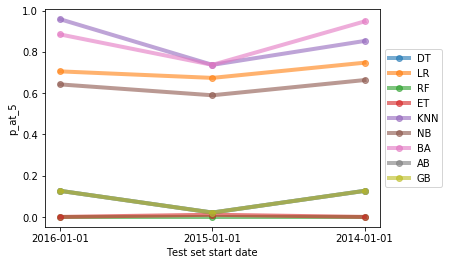

<Figure size 432x288 with 0 Axes>

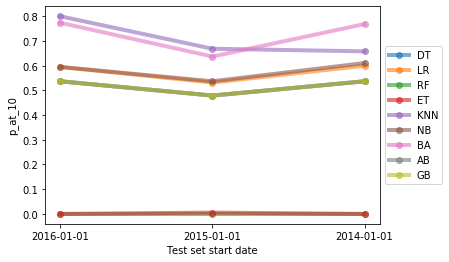

<Figure size 432x288 with 0 Axes>

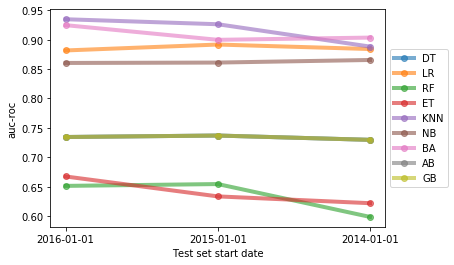

In [388]:
importlib.reload(pipeline)

for metric in metrics_to_display:
    #For each model, find the set of parameters that work the best in each train/test set
    best_models = pipeline.get_best_models_of_each_type_for_each_train_test_set(models_to_run,results,'test_set_start_date', metric)
    pipeline.plot_models_in_time(models_to_run, best_models, metric)
   